# Assignment 2a Due

In this assigment you will explore and become familiar with writing and using algorithms to numerically approxomate definite integrals.

Assignment Overview:
* Impliment your own midpoint, trapazoid, and Simpson's rule integration algorithms
* Use those to solve a definite integral
* Compare your algorithms to those from scipy
* Compare all approximate solutions to the exact solutions


You can import only the following packages: numpy, math, scipy, matplotlib.pyplot

In [1]:
#your import cell
import numpy as np
import math
import scipy.integrate
import matplotlib.pyplot as plt


Now we can define our integration algorithms

In [2]:
#define midpoint rule
def midpoint():
    z = (b - a) / n
    l = 0
    for j in range(0,n):
        x = z/2 + j * z
        m = f(x) * z
        l = l + m
    ll = str(l)
    print('Midpoint: ' + ll)
    result = l

In [3]:
#define trapazoidal rule
def trapezoid():
    z = (b - a) / n
    l = 0
    for j in range(0,n):
        b1 = j * z
        b2 = (j + 1) * z
        m = z * (f(b1) + f(b2)) / 2
        l = l + m
        j = f(b1)
    l = str(l)
    result = l
    print('Trapezoid: ' + l)

In [4]:
#define simpson's rule
def simpsons():
    z = (b - a) / n
    A = (z/3) * (f(a) + (4 * f(a+z)) + (2 * f(a+(2*z))) + (4 * f(a+(3*z))) + (2 * f(a+(4*z))) + (4 * f(a+(5*z))) + f(b))
    k = a + (z * 6)
    A = str(A)
    result = A
    print('Simpsons: ' + A)    

# Question 
Sanity checking your code is very important. How can you check that your functions are working properly?

For this notebook assigment we would like to solve the integral\
$\int_{a}^{b} \frac{2}{(2^2 + x^2)^{3/2}}dx$

# Question
Have you seen an integral like this before in physics? From where?

Solve the above integral using the numerical integrations that you wrote. When defining the function we will integrate over do so using python's **lambda** function.

For the integration take $a = 0,\; b = 2,\;$ and we will split it up into 6 partitions.

# Question
What is the exact solution?

In [5]:
#exact solution to the integral
w = 1/(2*math.sqrt(2))
print(w)

0.35355339059327373


In [6]:
##### solve the integral using your integration functions
a = 0
b = 2
n = 6
def f(x):
    return 2 / (4 + x**2) ** (3/2)
midpoint()
trapezoid()
simpsons()

Midpoint: 0.3538599754585315
Trapezoid: 0.35293994641413146
Simpsons: 0.3535517906244493


Use the trapz and simps methods from scipy's integration library to solve the integral.

Note: Shit+tab at the end of a function in jupyter notebook reveals lots of information about the function.

In [7]:
#scipy integration
arr = np.array([])
for j in range(0,n):
    z = (b - a) / n
    j = a + (z * j)
    j = f(j)
    arr = np.append(arr,j)
m = f(b)
arr = np.append(arr,m)
u = scipy.integrate.trapz(arr, dx=z, axis=- 1)
v = scipy.integrate.simps(arr, dx=z, axis=- 1)
u = str(u)
v = str(v)
print('Scipy Trapz: ' + u)
print('Scipy Simps: ' + v)

Scipy Trapz: 0.35293994641413146
Scipy Simps: 0.35355179062444925


# Question
How do scipy integrals compare to yours? Support your answer. 

In [8]:
#print the numerical values
midpoint()
trapezoid()
print('Scipy Trapz: ' + u)
simpsons()
print('Scipy Simps: ' + v)

Midpoint: 0.3538599754585315
Trapezoid: 0.35293994641413146
Scipy Trapz: 0.35293994641413146
Simpsons: 0.3535517906244493
Scipy Simps: 0.35355179062444925


Numerically compare your midpoint, trapazoid, and Simpson method results to the exact value by calculating the quantity (approx - exact) / exact for each method. 

In [10]:
#numerical comparisons
mp = 0.3538599754585315
mr = (mp - w) / w
mtr = str(mr)
print('Midpoint Comparison: ' + mtr)

tp = 0.35293994641413146
tr = (tp - w) / w
ttr = str(tr)
print('Trapezoid Comparison: ' + ttr)

sp = 0.3535517906244493
sr = (sp - w) / w
str = str(sr)
print('Simpsons Comparison: ' + str)


Midpoint Comparison: 0.0008671529489316845
Trapezoid Comparison: -0.001735082155803672
Simpsons Comparison: -4.525395221761466e-06


# Question
Which method provides the best approximation to the exact solution?

It is often useful to represent the data graphically. Make a scatter plot showing the percent difference $100 \times \frac{approx. - exact}{exact}$ vs. integration method. Integration method on your x-axis should be strings such as *midpoint, trapazoid, and Simpson*. You should also draw on your plot a line at *y = 0*, which will help guide the eye where the perfect approximation (the exact solution) would sit. 

[0.3538599754585315, 0.35293994641413146, 0.3535517906244493]
[ 0.08671529 -0.17350822 -0.00045254]


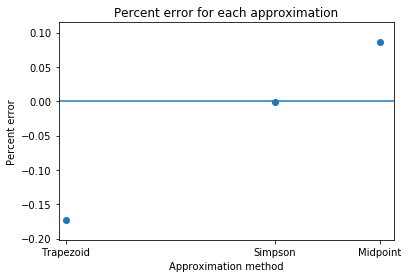

In [21]:
#plot
xvalues = [mp,tp,sp]
print(xvalues)
yvalues = [mr,tr,sr]
yvalues = np.array(yvalues)
yvalues = yvalues * 100
labels = ['Midpoint', 'Trapezoid', 'Simpson']
print(yvalues)
plt.scatter(xvalues, yvalues)
plt.xticks(xvalues, labels)
plt.xlim(0.35292,0.3539)
xx = np.linspace(0, 10, 1000)
plt.plot(xx, xx * 0)
plt.title('Percent error for each approximation')
plt.ylabel('Percent error')
plt.xlabel('Approximation method')
plt.show()

Using the scipy *quad* integration method, approximate the following integral

$$\int_{-\infty}^{\infty} e^{-x^{2}} dx$$

Hint: Reference <a href="https://numpy.org/">numpy</a> and see what it has to offer in terms of functions and *special* values

In [26]:
#solve integral above
def f(x):
    result = math.exp(-1 * x) ** 2
scipy.integrate.quad(f(x), -np.inf, np.inf)


NameError: name 'x' is not defined

# Question
If you square your solution, does the resulting number have any special meaning?